### Mergen Elbegsaikhan - 106077435 - IMBA
# Data Mining Lab 1
## Assignment 1
## Part 1

----

In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import helpers.data_mining_helpers as dmh
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords 
import os
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
import plotly.graph_objs as go
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
source_dataset = pd.DataFrame({'fn': count_vect.get_feature_names(), 'freq': term_frequencies})
mlb = preprocessing.LabelBinarizer()
tt = TfidfVectorizer()

---

### >>> **Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
X.loc[X['category'] > 1][0:10]

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med


By experimenting with the querying techniques I've learned there are many ways to sort/order the results. This is an example that allows me to sort the data in the category column, in this case it shows me the first 10 results that is more than 1.

---

### >>> **Exercise 5 (take home):** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


#### Answer:

A - np.nan - numpy interpret's it as NaN, a float value that you get if you perform a calculation whose result can't be expressed as a number. When np.nan is used, it will take it as empty/no data.

B - it is missing it's index, 'missing_example'. So, it says NaN since there is no data.

C - is directed to show the letters "NaN". The apostrophes are a great responsibility, you must think twice whenever you input them.

D - same as C it shows "None".

E - basically the same as np.nan, and is interpreted as a missing value.

F - same as C, D. Apostrophes.

---

### >>> **Exercise 6 (take home):**
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

#### Answer:

By doodling around and applying all the things we've done with the original data to the sample, I've found out by querying that all order is lost. It is sorted behind the scene when we assigned "n". Even with my meticulous checking of every data, I could only notice this one small difference. Probably this is why it is called "sampling" and It should not vary from the original, right?

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

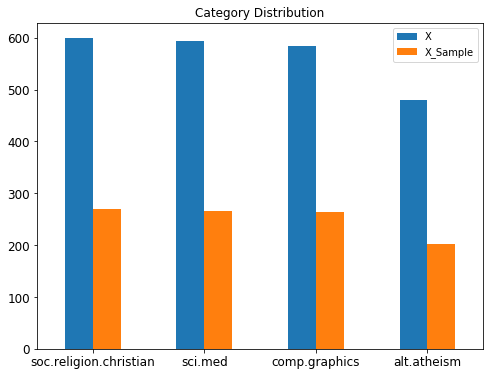

In [5]:
X_sample = X.sample(n=1000)

graph_df = X.category_name.value_counts().rename('X').to_frame()\
            .join(X_sample.category_name.value_counts().rename('X_Sample').to_frame())

graph_df.plot(kind = 'bar', figsize=(8, 6), rot = 0, fontsize = 12, title = 'Category Distribution')

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [6]:
#Answer1
A = pd.SparseDataFrame(X_counts, columns = count_vect.get_feature_names(),
                                 index = X.index, default_fill_value = 0)
A[4:5]

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Answer2
O = count_vect.inverse_transform(X_counts[4:5, 0:100].toarray())
O

[array(['00', '01'], dtype='<U80')]

I've tried two different methods, in $Answer 1$ we can see all the feature names of the entire data set. However, it will show you all the entries of the vocabulary which will be usually unnecessary. $Answer 2$, on the other hand, shows us exactly the representations of the first 100 columns which are '00' and '01'. The method of $Answer 2$ is precise and efficient, it shows us what we need exactly.

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

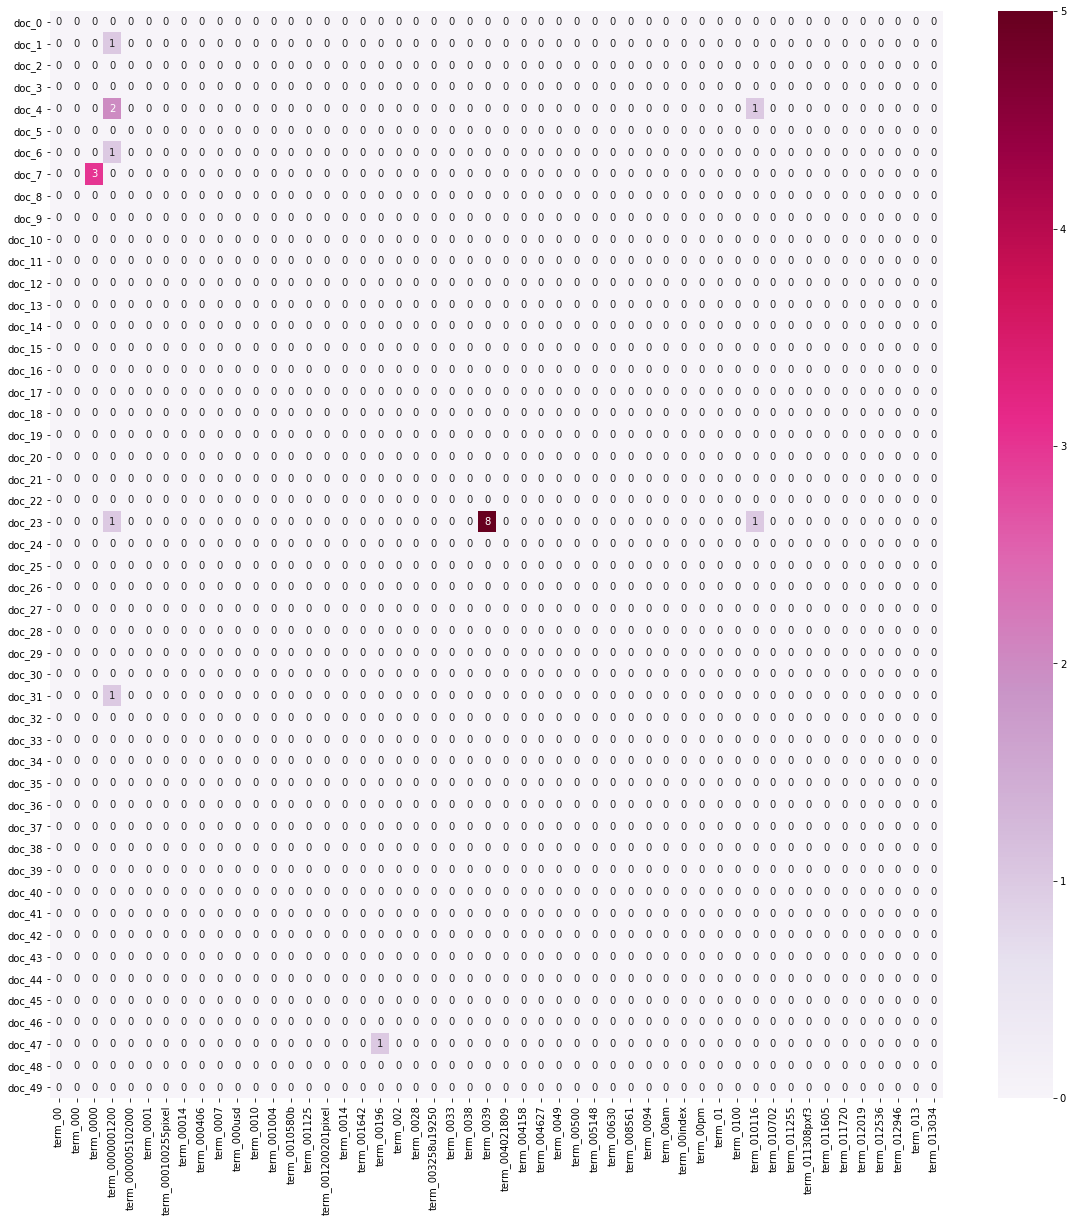

In [8]:
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names()[0:50]]
plot_y = ["doc_" + str(i) for i in list(X.index)[0:50]]
plot_z = X_counts[100:150, 100:150].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

Here we see a heatmap, it would make more sense if we could fit the indces and range for the entire data set. Since the data is large it is irrelevant to take samples, unless you are searching for something specific. If you don't have a state of the art hardware that can handle the process to show the heatmap for our data set of 2257 rows x 35788 columns, I suggest using $plotly$.

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

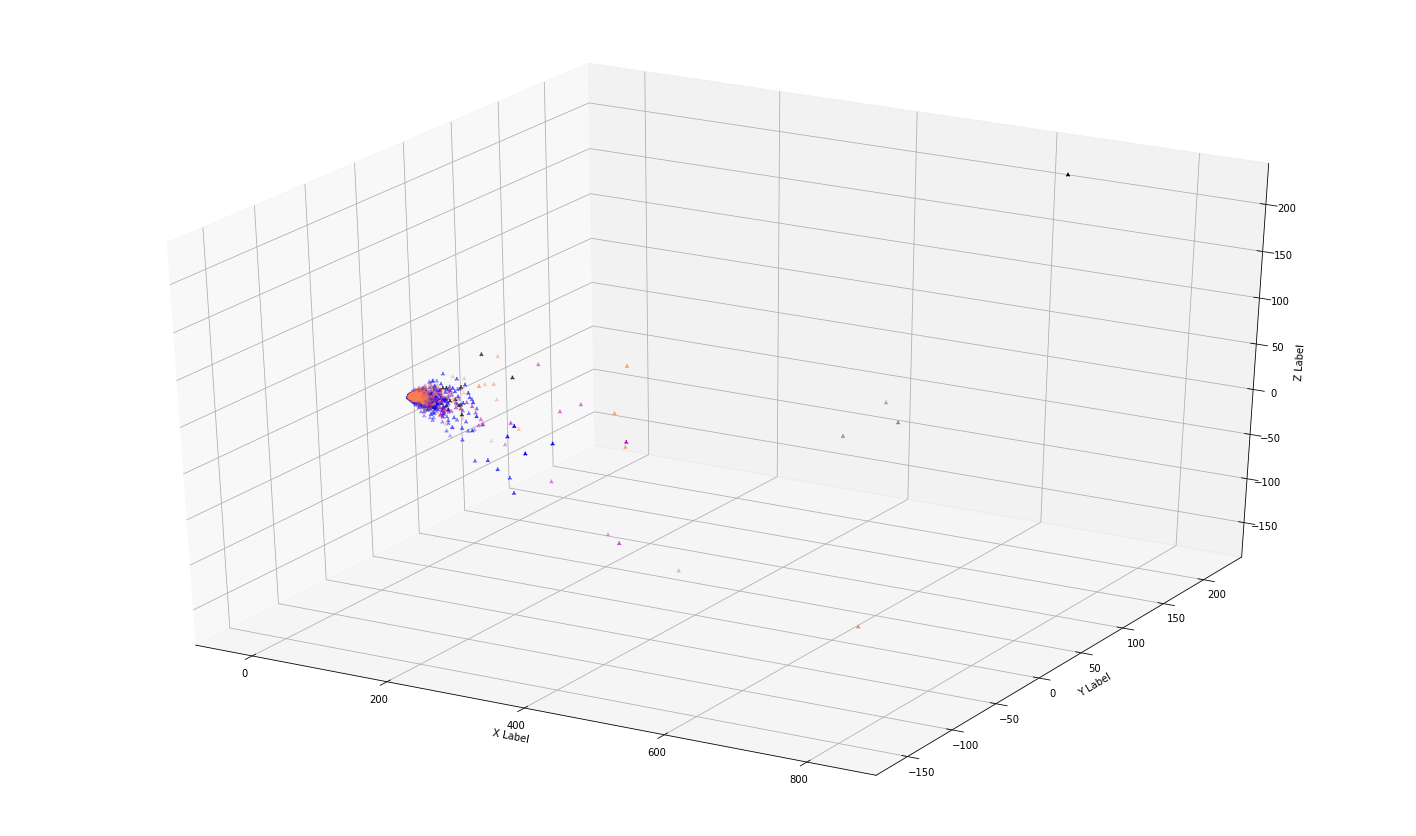

In [9]:
ThreeDee = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig = plt.figure(figsize = (25,15))
ax = fig.add_subplot(111, projection='3d')

col = ['coral', 'blue', 'black', 'm']

for c, category in zip(col, categories):
    x = ThreeDee[X['category_name'] == category].T[0]
    y = ThreeDee[X['category_name'] == category].T[1]
    z = ThreeDee[X['category_name'] == category].T[2]
    
    ax.scatter(x, y, z, c = c, marker = '2')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

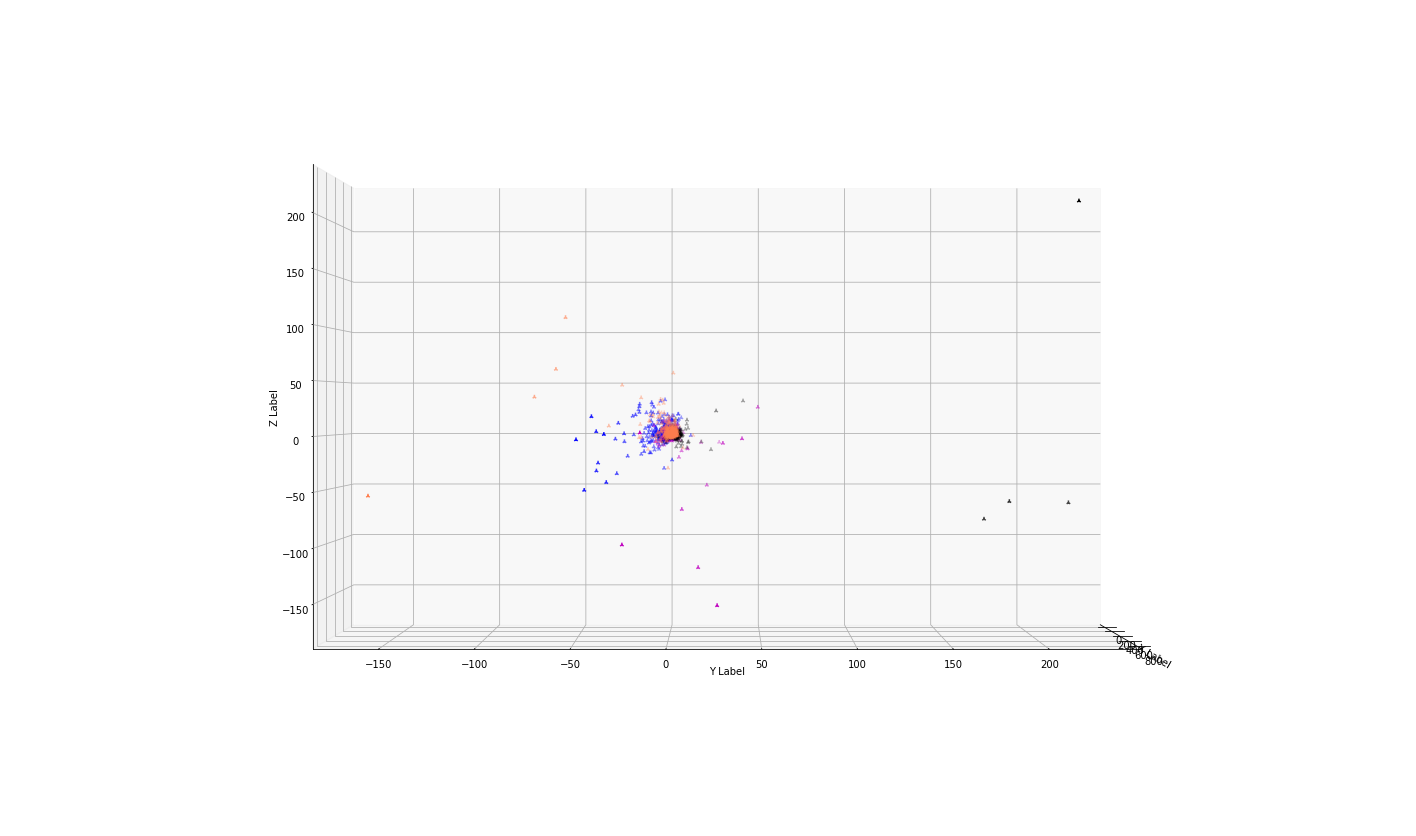

In [10]:
ThreeDee = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig = plt.figure(figsize = (25,15))
ax = fig.add_subplot(111, projection='3d')

col = ['coral', 'blue', 'black', 'm']

for c, category in zip(col, categories):
    x = ThreeDee[X['category_name'] == category].T[0]
    y = ThreeDee[X['category_name'] == category].T[1]
    z = ThreeDee[X['category_name'] == category].T[2]
    
    ax.scatter(x, y, z, c = c, marker = '2')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(0, 0)

plt.show()

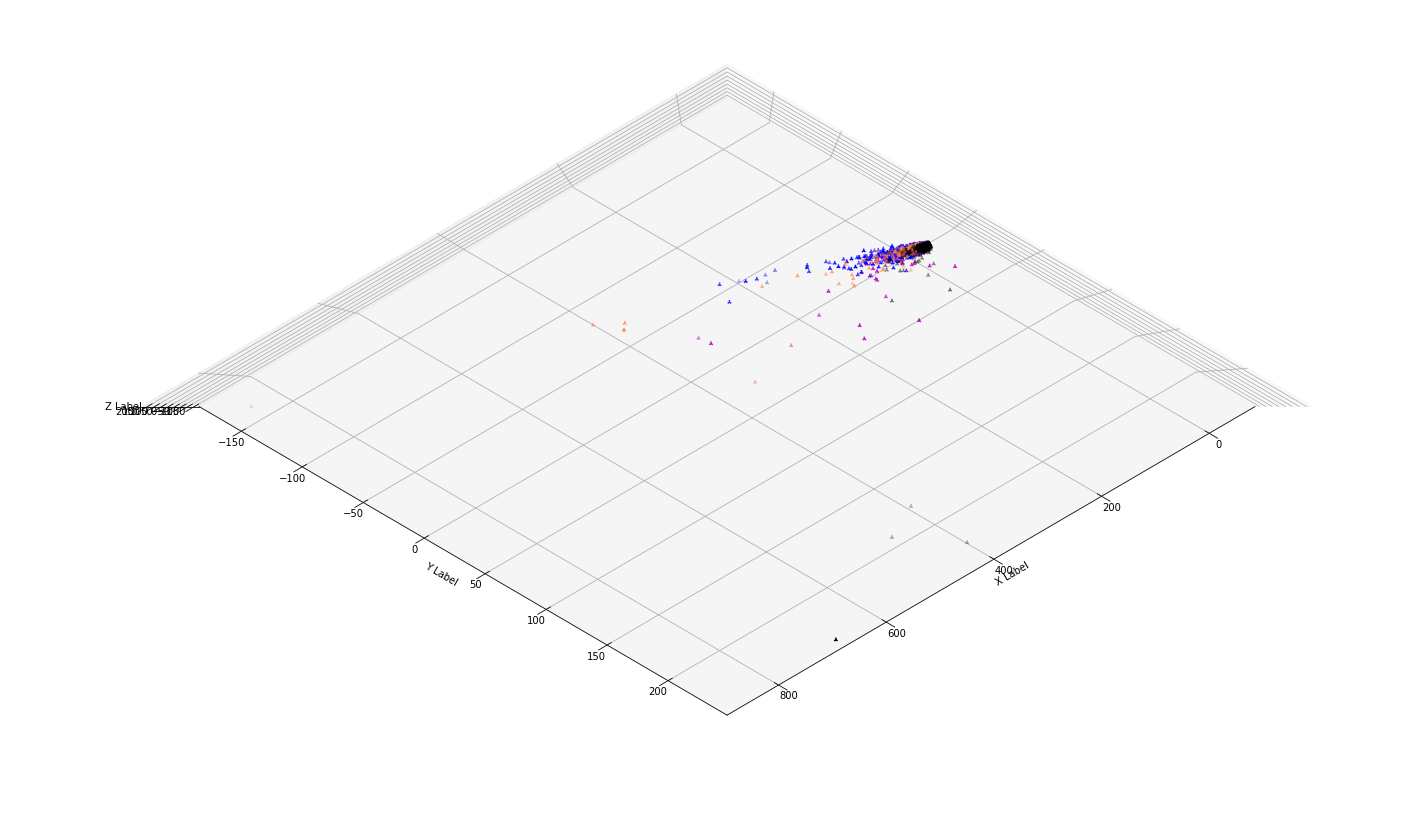

In [11]:
ThreeDee = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig = plt.figure(figsize = (25,15))
ax = fig.add_subplot(111, projection='3d')

col = ['coral', 'blue', 'black', 'm']

for c, category in zip(col, categories):
    x = ThreeDee[X['category_name'] == category].T[0]
    y = ThreeDee[X['category_name'] == category].T[1]
    z = ThreeDee[X['category_name'] == category].T[2]
    
    ax.scatter(x, y, z, c = c, marker = '2')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(90, 45)

plt.show()

By changing the angles I've reached the conclusion that there multiple ways to interpret data. By reducing the dimension and changing the angles we can find clusters and analyze them.

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [7]:
# Answer here
def plot_word_frequency (word_list, plot_title): 
    
    trace1 = { 
    "x": list(word_list[0]), 
    "y": list(word_list[1]), 
    "type": "bar"
    }
    
    data = go.Data([trace1]) 

    layout = { 
    "title" : plot_title,
    "yaxis" : {"title":"Frequency"}
    }

    fig = go.Figure(data = data, layout = layout)  
    return fig

py.offline.iplot(plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution (All)"))

C:\Users\negga\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [8]:
decrease_dataset = source_dataset[source_dataset['freq'] > 2000]

def plot_word_frequency (word_list, plot_title):
    
    trace1 = { 
    "x": list(word_list[0]), 
    "y": list(word_list[1]), 
    "type": "bar"
    }
    
    data = go.Data([trace1]) 

    layout = { 
    "title" : plot_title,
    "yaxis" : {"title":"Frequency"}
    }

    fig= go.Figure (data = data, layout = layout)  
    return fig

py.offline.iplot(plot_word_frequency([decrease_dataset['fn'],decrease_dataset['freq']], "Term Frequency Distribution (> 2000)"))

C:\Users\negga\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [9]:
sortof_df = decrease_dataset.sort_values(by = 'freq', ascending=False)

def plot_word_frequency (word_list, plot_title): 
    
    trace1 = { 
    "x": list(word_list[0]), 
    "y": list(word_list[1]), 
    "type": "bar"    
    }
    
    data = go.Data([trace1]) 

    layout = { 
    "title" : plot_title,
    "yaxis" : {"title":"Frequency"}
    }

    fig = go.Figure (data = data, layout = layout)  
    return fig

py.offline.iplot(plot_word_frequency([sortof_df['fn'],sortof_df['freq']], "Term Frequency Distribution"))

C:\Users\negga\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [15]:
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist() 
 
X[0:9]

,text,category,category_name,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"


Works.

---

## Part 2

## Data Preparation

In [16]:
#Importing and merging the three data sets
text = pd.read_csv('amazon_cells_labelled.txt', header = None,sep = '\t')
text = text.append(pd.read_csv('imdb_labelled.txt', header = None, sep = '\t'))
text = text.append(pd.read_csv('yelp_labelled.txt', header  = None, sep = '\t'))

In [17]:
#Columns
text.columns = ['sentiment','score']
text.columns

Index(['sentiment', 'score'], dtype='object')

In [18]:
#Checking if everything is imported successfully
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 999
Data columns (total 2 columns):
sentiment    2748 non-null object
score        2748 non-null int64
dtypes: int64(1), object(1)
memory usage: 64.4+ KB


In [19]:
text.describe()

,score
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [20]:
text[0:10]

,sentiment,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


---

## Data Transformation

In [21]:
text.loc[::, 'sentiment'][0:10]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentiment, dtype: object

---

## Data Mining using Pandas

In [22]:
#Checking if we have missing values
text.isnull()

,sentiment,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [23]:
#Making sure
text.isnull().apply(lambda X: dmh.check_missing_values(X))

sentiment    (The amoung of missing records is: , 0)
score        (The amoung of missing records is: , 0)
dtype: object

In [24]:
#Checking duplicates
sum(text.duplicated())

17

This is due to same comments, but different records. In such a big data set, duplicates can happen. No need for dropping.

---

## Data Processing

In [25]:
text['letter count'] = text['sentiment'].apply(len)
text[0:10]

,sentiment,score,letter count
0,So there is no way for me to plug it in here i...,0,82
1,"Good case, Excellent value.",1,27
2,Great for the jawbone.,1,22
3,Tied to charger for conversations lasting more...,0,79
4,The mic is great.,1,17
5,I have to jiggle the plug to get it to line up...,0,74
6,If you have several dozen or several hundred c...,0,111
7,If you are Razr owner...you must have this!,1,43
8,"Needless to say, I wasted my money.",0,35
9,What a waste of money and time!.,0,32


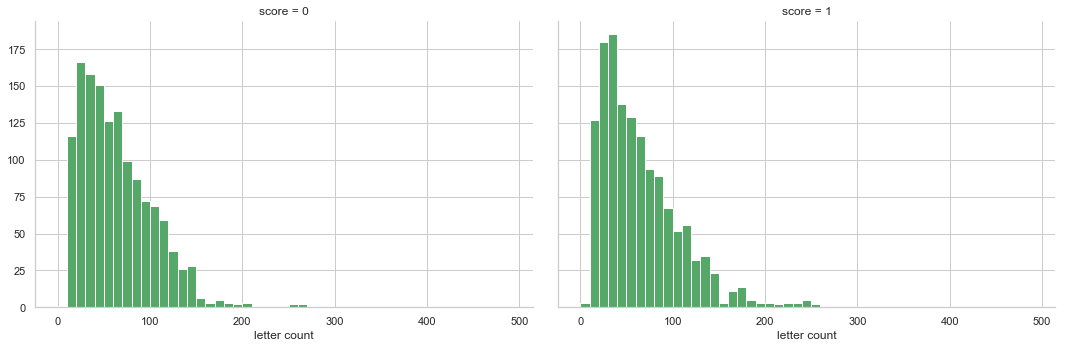

In [26]:
sns.set(style="whitegrid")
bins = np.arange(0, 500, 10)
ax = sns.FacetGrid(text, col = 'score', height=5, aspect=1.5)
ax.map(plt.hist, 'letter count', bins = bins, color = 'g')

(0, 500)

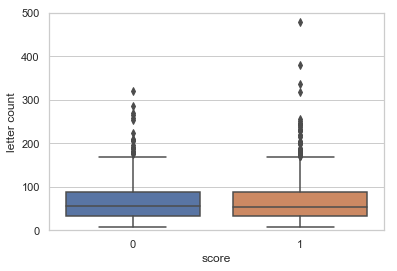

In [27]:
sns.boxplot(x = 'score', y = 'letter count', data = text)
plt.ylim(0,500)

In [28]:
newt = tt.fit_transform(text['sentiment'])
print(newt.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
newt.nnz
density = (100.0 * newt.nnz / (newt.shape[0] * newt.shape[1]))

y = text['score']
density

0.21371684476991995

In [30]:
print("shape of review text", newt.shape)

shape of review text (2748, 5155)


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(newt, y, test_size=0.3, random_state=101)
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
preds = nb.predict(X_test)

In [33]:
print(confusion_matrix(Y_test, preds))
print('\n')
print(classification_report(Y_test, preds))

[[334  78]
 [ 90 323]]


             precision    recall  f1-score   support

          0       0.79      0.81      0.80       412
          1       0.81      0.78      0.79       413

avg / total       0.80      0.80      0.80       825



In [34]:
tt.vocabulary_

{'so': 4161,
 'there': 4545,
 'is': 2427,
 'no': 3043,
 'way': 4987,
 'for': 1829,
 'me': 2809,
 'to': 4609,
 'plug': 3387,
 'it': 2432,
 'in': 2314,
 'here': 2158,
 'the': 4531,
 'us': 4835,
 'unless': 4793,
 'go': 1982,
 'by': 647,
 'converter': 1013,
 'good': 1993,
 'case': 713,
 'excellent': 1603,
 'value': 4861,
 'great': 2023,
 'jawbone': 2449,
 'tied': 4589,
 'charger': 768,
 'conversations': 1012,
 'lasting': 2567,
 'more': 2931,
 'than': 4526,
 '45': 45,
 'minutes': 2890,
 'major': 2753,
 'problems': 3482,
 'mic': 2868,
 'have': 2113,
 'jiggle': 2464,
 'get': 1954,
 'line': 2648,
 'up': 4821,
 'right': 3777,
 'decent': 1171,
 'volume': 4928,
 'if': 2282,
 'you': 5138,
 'several': 4004,
 'dozen': 1373,
 'or': 3144,
 'hundred': 2259,
 'contacts': 987,
 'then': 4542,
 'imagine': 2294,
 'fun': 1901,
 'of': 3097,
 'sending': 3968,
 'each': 1440,
 'them': 4538,
 'one': 3124,
 'are': 273,
 'razr': 3611,
 'owner': 3200,
 'must': 2980,
 'this': 4558,
 'needless': 3010,
 'say': 3889,
 '